##  Decision Trees
Decision trees, builds model by constructing tree around the features of dataset. Unlike trees you see through windows, decision trees are upside down with root at it's top. It is robust as compared to other models like kNN, Linear regression which fail on missing data in some of features.<br>
Decision trees can be used for both classification and regression modelling based on yout dataset.They are referred to as **CART** model - Classification and/or Regression Trees.<br>
<hr>
<img src="tree.png" id="link"></img>
<br>
**Figure 1**
<br>
Further granularity https://drive.google.com/file/d/1wqxhrf11fuqDzXGKlp4nBzkLQ8kSXrmh/view?usp=sharing
<hr>
Famously used algorithms or methods used for decision trees are *ID3,CART and C4.5*. All of the algorithms follow **splitting criterion** for splitting the node based on best fit feature for the node. Decision tree follows recursive approach in splitting the nodes to construct the tree in accordance with dataset.<br>
Below figure lists comparsion between above mentioned algorithms.
![algorithms](algorithms.jpeg)
<br>
I will be discussing on ID3 splitting criterion.<br>
**ID3** is  non incremental method i.e it solves or builds upon fixed set of attributes or features. It selects the best attribute among others based on the information gain metric. Information gain is statistical property which measures how well the attribute to be choosen separates the dataset.<br>
ID3 is a two step process:
1. *Calculate Entropy which measures amount information in the given attribute*:<br>
&emsp;&emsp;&emsp;&emsp; $Entropy(S)=-\sum p(I)log(p(I))$
<br>
$S$ is the whole sample space and $I$ is class in sample space. Entropy is zero if all records or samples belong to same class.
<br><br>
2. *Information gain of attributes*:<br>
&emsp;&emsp;&emsp;&emsp; $Gain(S,A)=Entropy(S) -\sum (|S_{v}|/|S|)Entropy(S_{v})$
<br>
$S_{v}$ is subset of S for which attribute A has value v.<br>
$|S_{v}|$ is number elements in $S_{v}$.<br>
$|S|$ is number of elements in $S$.<br>

<br>
Based on information gain, attribute with highest gain will be chossen for decision node. And same process continues with remaining attributes for further construction of the tree. We stop when we get **entropy as zero**.
<hr>
Like every algorithm even decision trees have it's own disadvantages:<br>
* Prone to overfit, fails to generalize over dataset.

<br>
We have techniques to improve our models using below techniques:
* *Pruning*:<br>
We remove attributes from from bottom up i.e from end nodes of tree. This is used to improve generalisation of the model. <br>
Further reading:https://www.coursera.org/learn/ml-classification/lecture/qvf6v/optional-pruning-decision-trees-to-avoid-overfitting
<br><br>
* *Ensemble methods*:<br>
We will be using group of predictive models instead of single model for better generalised results, where each model is trained sub samples resulting in better prediction. **Random forests** is one of them, and very robust machine learning model.
<hr>
Below is implementation of decision tree.
The dataset is conatins details of social network users. An automobile company, client of social network has posted an ad of their new luxury car. The target variable in dataset is whether user bought the car or not.

In [1]:
# Decision Tree Classification

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

labels = {0:'Not purchased',1:'Purchased'}

In [2]:
# FOr better training, we need to scale our dataset
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

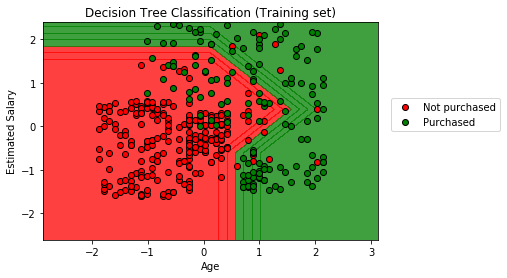

In [3]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 1))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = labels[i],edgecolor='black' )
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend(loc=(1.04,0.5))
plt.show()

<a href='#link'><u>Figure 1</u></a> is the decision tree process of above dataset.

#### Further reading:
1. https://www.cise.ufl.edu/~ddd/cap6635/Fall-97/Short-papers/2.htm 
2. https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/
3. https://users.info.uvt.ro/~dzaharie/dm2016/projects/DecisionTrees/DecisionTrees_ID3Tutorial.pdf
4. https://www.xoriant.com/blog/product-engineering/decision-trees-machine-learning-algorithm.html